In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
crime=pd.read_csv('crime_data (3).csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
## Normalizing function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
## normalizing all values except Unnamed:0

crime_n=norm_func(crime.iloc[:,1:])
crime_n.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [8]:
crime_n.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [15]:
k=list(range(15,30))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(crime_n)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(crime_n.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,crime_n.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([7.2912061]),
 array([7.09100934]),
 array([6.67184371]),
 array([6.333579]),
 array([6.05265966]),
 array([5.63867552]),
 array([5.59390503]),
 array([5.26375044]),
 array([5.00647509]),
 array([4.68220873]),
 array([4.45408539]),
 array([4.06581909]),
 array([3.9216454]),
 array([3.78623434]),
 array([3.54134838])]

([<matplotlib.axis.XTick at 0x2942297f6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

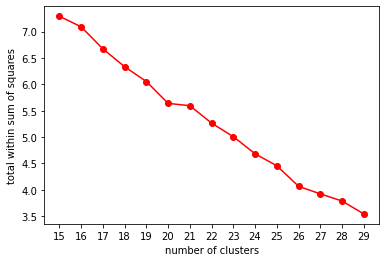

In [16]:
## Scree plot
plt.plot(k,TWSS, 'ro-');plt.xlabel('number of clusters');plt.ylabel('total within sum of squares');plt.xticks(k)

In [17]:
## considering first elbow = 20

model1=KMeans(n_clusters=20)
model1.fit(crime_n)

KMeans(n_clusters=20)

In [18]:
model1.cluster_centers_
# getting the labels of clusters assigned to each row
model1.labels_

array([18, 11,  2, 12, 10,  4,  7, 13,  6,  0, 16,  1, 15,  9, 17,  9, 19,
        0, 17,  6,  7,  6,  1,  3,  4,  1,  1, 10, 17,  7,  6, 15,  3,  5,
        9,  9, 14,  9,  7,  3,  8, 18, 15, 14,  5, 12, 14,  8, 17, 12])

In [19]:
# converting numpy array into pandas series object 
model=pd.Series(model1.labels_)
model

0     18
1     11
2      2
3     12
4     10
5      4
6      7
7     13
8      6
9      0
10    16
11     1
12    15
13     9
14    17
15     9
16    19
17     0
18    17
19     6
20     7
21     6
22     1
23     3
24     4
25     1
26     1
27    10
28    17
29     7
30     6
31    15
32     3
33     5
34     9
35     9
36    14
37     9
38     7
39     3
40     8
41    18
42    15
43    14
44     5
45    12
46    14
47     8
48    17
49    12
dtype: int32

In [20]:
crime['clust']=model

In [21]:
model.head()

0    18
1    11
2     2
3    12
4    10
dtype: int32

In [23]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,18
1,Alaska,10.0,263,48,44.5,11
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,12
4,California,9.0,276,91,40.6,10
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,7
7,Delaware,5.9,238,72,15.8,13
8,Florida,15.4,335,80,31.9,6
9,Georgia,17.4,211,60,25.8,0


In [24]:
crime['clust'].value_counts()

9     5
7     4
17    4
1     4
6     4
15    3
14    3
3     3
12    3
4     2
5     2
0     2
8     2
18    2
10    2
11    1
13    1
2     1
16    1
19    1
Name: clust, dtype: int64

We have found out that the K value = 20 considering the first elbow in the graph above. There are a total of 20 clusters. The highest clusters being cluster 9, 7, 17, 1 & 6 respectively